In [1]:
!pwd

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/test


In [2]:
%cd /home/giakhang/dev/multi_task_autopilot/YOLOF-Mask

/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask


In [3]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
import matplotlib.pyplot as plt
import torch

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

from detectron2.data.datasets.coco_panoptic import register_coco_panoptic_separated

In [4]:
from detectron2.model_zoo import get_config
from detectron2.config import LazyConfig
from detectron2.config.instantiate import instantiate
from detectron2.engine import DefaultPredictor

cfg = LazyConfig.load("/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/configs/PanopticSegmentation/panoptic_fpn_R_50_1x.py")

cfg.train.device = 'cuda:0'
#cfg.dataloader.evaluator.dataset_name = 'bdd100k_val_separated'
#cfg.dataloader.train.dataset.names = 'bdd100k_train_separated'
#cfg.dataloader.test.dataset.names = 'bdd100k_val_separated'
#cfg.dataloader.train.total_batch_size = 16

cfg.train.init_checkpoint = "/home/giakhang/Downloads/model_final_dbfeb4.pkl"

In [5]:
from yolof_mask.engine.default_predictor import DefaultPredictor

predictor = DefaultPredictor(cfg)

[11/09 19:50:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from /home/giakhang/Downloads/model_final_dbfeb4.pkl ...


In [6]:
im = cv2.imread("/home/giakhang/dev/multi_task_autopilot/YOLOF-Mask/bdd100k/images/10k/test/fd866470-7cc453f1.jpg")
predictions = predictor(im)

/home/giakhang/anaconda3/envs/yolof_mask/lib/python3.10/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /opt/conda/conda-bld/pytorch_1702400366987/work/aten/src/ATen/native/TensorShape.cpp:3526.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


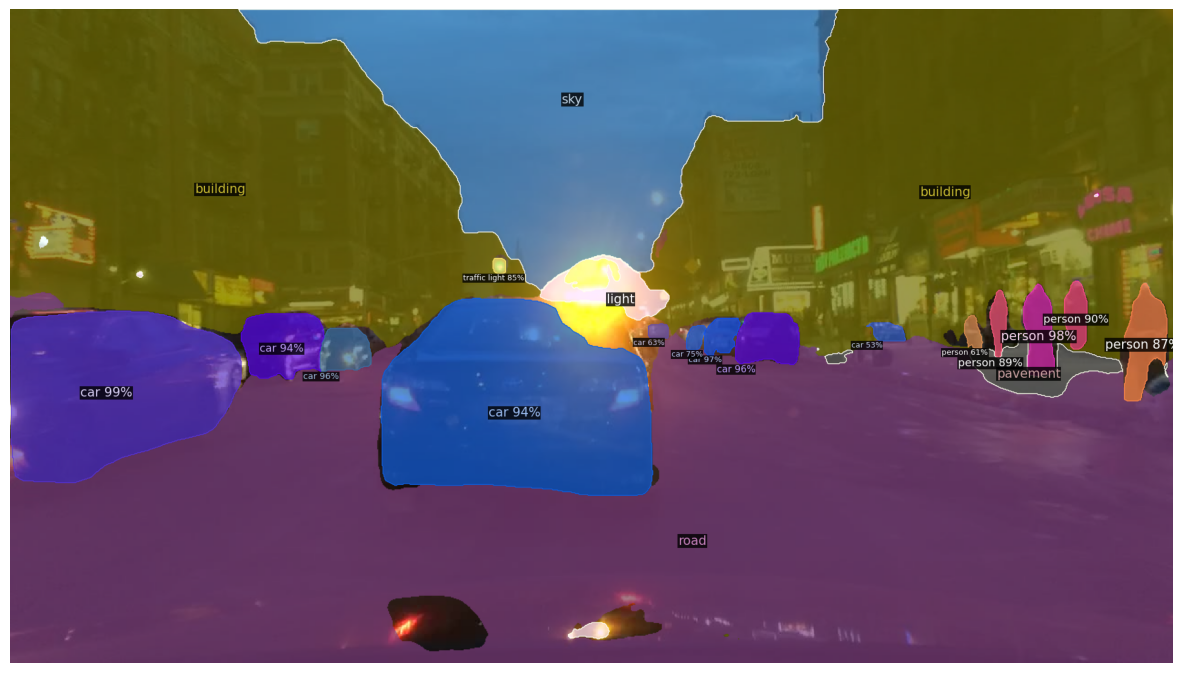

In [7]:
import matplotlib.pyplot as plt

panoptic_seg, segments_info = predictor(im)["panoptic_seg"]
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.dataloader.train.dataset.names), scale=1.5)
out = v.draw_panoptic_seg_predictions(panoptic_seg.to("cpu"), segments_info)

_ = plt.figure(figsize=(15, 17))
plt.axis('off')


plt.imshow(out.get_image())